# Lesson 4.4: Feature Selection, Data Processing & KNN Algorithm

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to manage multiple categorical variables with _feature selection techniques_ and to go in detail on data preprocessing techniques for numerical variables. Students will learn about another regression algorithm - the `KNN` (_k nearest neighbor_).

---

### Setup

- All previous set up
- Please use the same Jupyter as used in the previous lesson

### Learning Objectives

After this lesson, students will be able to:

- Perform feature selection for categorical variables
- Implement different scaling techniques for numerical variables
- Describe how KNN algorithm works

---

### Lesson 1 key concepts

> :clock10: 20 min

Revisiting feature selection techniques looked at earlier

- Chi-square tests for independence of categorical variables

**Chi-square Test for Independence of Categorical variables**

- Categorical variables: _nominal_ vs. _ordinal_ (a quick overview)
- _Chi-square test_ is used to determine if there is a significant relationship between two nominal (categorical) variables. It works well with nominal categorical variables and it doesn't work well with ordinal categorical variables as the test is based on a contingency table (as we would see later) and the order in which frequencies are put in the table, does not change the result of the chi-square test.

In the contingency table, the frequency of each category for one nominal variable is compared across the frequencies of categories of the second nominal variable. Here is the code to show how to check the contingency table in Python:

In [62]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
pd.set_option('display.max_columns', None)

In [63]:
with open('./files_for_lesson_and_activities/data_cleaned.pickle', 'rb') as fp:
    data = pickle.load(fp)

In [64]:
# contingency table
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins = False)
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
DOMAIN,,,,,,,,,,,,,,
C1,249,1842,926,283,689,328,114,421,230,113,210,219,108,61
C2,413,2415,1002,436,916,383,205,640,277,153,434,318,163,79
C3,300,1620,605,298,558,199,155,410,166,54,319,228,106,38
R1,62,419,185,52,157,72,26,113,52,24,50,37,24,12
R2,782,4041,1532,778,1472,597,397,1060,480,190,742,535,286,114
R3,311,1486,441,280,488,178,165,380,143,53,319,200,93,35
S1,410,3627,1884,411,1231,695,198,751,438,193,368,344,208,108
S2,396,2631,1016,401,995,312,184,673,332,126,383,346,191,68
S3,81,633,198,79,205,53,56,157,68,31,117,89,32,18


- Based on the data in the contingency table we calculate the expected value of the nominal variables. Based on the expected values, the _chi-square test_ statistic is calculated which helps us decide on whether the variables are independent or not. Technically, though the value of the test statistic we are trying to prove or disprove some hypotheses on the independence of categorical variables.

- `H0` (_Null Hypothesis_) - assumes that there is no association between the two variables.
- `Ha` (_Alternate Hypothesis_) - assumes that there is an association between the two variables.

# 4.04 Activity 1

Keep working with `unit4.csv` that you already have locally.

Use the _Chi-Square_ test for measuring the salary differences between men and women.

**Solution to Activity 1:**

- We could if we grouped the salary into smaller chunks, but it would not be the most appropriate approach as the variable _salary_ is continuous, in this case, a t-test (or other categorical - continuous tests) would be a better option. You can also generate a new categorical variable with values `['HIGH_INCOME', 'LOW_INCOME']`. Discuss the results.

In [65]:
from scipy.stats import chi2_contingency

In [66]:
data['INCOME'] = data['INCOME'].fillna(data['INCOME'].mean())

In [67]:
data_crosstab = pd.crosstab(np.where(data['INCOME']>3,'HIGH_INCOME', 'LOW_INCOME'), data['GENDER'], margins = False)

In [68]:
data_crosstab

GENDER,F,M,other
row_0,,,
HIGH_INCOME,32013,25344,1154
LOW_INCOME,16655,11788,820


In [69]:
chi2, p, do, expected = chi2_contingency(data_crosstab, correction=False)

### Lesson 2 key concepts

> :clock10: 20 min

- Working with the established hypothesis

**Working with hypothesis testing and stat**

- If the observed chi-square test statistic is greater than the critical value (this value is known already based on certain parameters) in the data, the null hypothesis can be rejected.
- If the observed chi-square test statistic is lower than the critical value (this value is known already based on certain parameters) in the data, the null hypothesis is accepted (also put as we fail to reject the null hypothesis) ie. based on the statistics we either reject `H0` or we fail to reject `H0`. You can also use the `p` value directly as we will see later in the lesson.

Note: This is only a very brief introduction to the concept of hypothesis testing. We will talk about it in the next couple of weeks.

- Three important values that we measure in order to calculate the Chi-square test statistic are:

      - Degrees of freedom `(r-1)\*(c-1)` where `r` is the number of rows and `c` is the number of columns
      - Actual frequencies
      - Expected frequencies

- Based on these values we calculate the test statistic that helps us determine if we reject or fail to reject the null hypothesis.

https://en.wikipedia.org/wiki/Chi-squared_test

In [26]:
from scipy.stats import chi2_contingency
chi2, p, do, expected = chi2_contingency(data_crosstab, correction=False)

In [27]:
p

3.738583051650944e-170

This returns 4 results in this order (_chi-square_ statistic, _p_ value, degrees of freedom, expected frequencies matrix). Looking at the _p_ value, it is usually compared against 0.05. We will talk about _p_ value later but now we will just use this to decide on the variables directly.

Since in this case, the _p_ value is less than 0.05 we can reject the null hypothesis (that there is no relationship between the two categorical variables); ie. there is a correlation between the two variables. Hence we can drop one of the two columns. In this case, we are going to drop the column `RFA_2`.

# 4.04 Activity 2

Keep using the same dataset.

1. Repeat the same steps already done on the class for the columns `STATE` and `DOMAIN` to find the _chi-square_ statistic.
2. Check the `p` value to decide to reject or fail to reject the null hypothesis. If you reject the null hypothesis, then drop one of the columns (`STATE` here).

#### :pencil2: Check for Understanding - Class activity/quick quiz

### ~~Lesson 3 key concepts~~

> :clock10: 20 min

- Data Preprocessing for numerical variables
- Difference between standardization, normalization and min-max scaling

**Description:**

- _Standard scaler_: Removes the mean and scales the data to unit variance. For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
- _Min-max scaler_: It scales the data in the range of `[0,1]`. For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.
- _Normalize_: It rescales the vector to have a unit norm. This means that, for each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.

More info: [Additional reading](https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing)

In [31]:
# We will use the data we got after using VIF step for feature selection
# we will use it for numerical variables
data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
data_corr['INCOME'].fillna(np.mean(data_corr['INCOME']), inplace=True)
data_corr['TIMELAG'].fillna(np.mean(data_corr['TIMELAG']), inplace=True)

In [32]:
data_corr.head()
numerical = data_corr.drop(['AVGGIFT'], axis=1)

In [39]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data_corr)
x_standardized = transformer.transform(data_corr)
#x_standardized

In [40]:
# Min-max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(data_corr)
x_min_max = transformer.transform(data_corr)
# x_min_max

In [41]:
# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_corr)
x_normalized = transformer.transform(data_corr)
# x_normalized

# 4.04 Activity 3

Keep using the same dataset.

Check the distributions of the numerical data (`numerical`) we got and decide which scaler should perform better with it. 

**Hint**: You can also plot the scaled distributions.

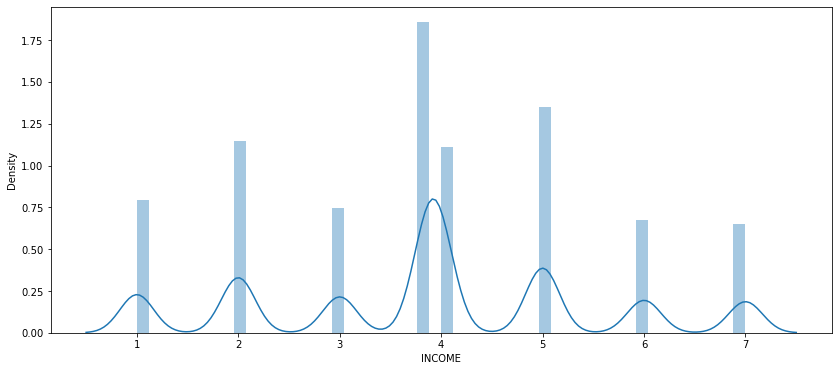

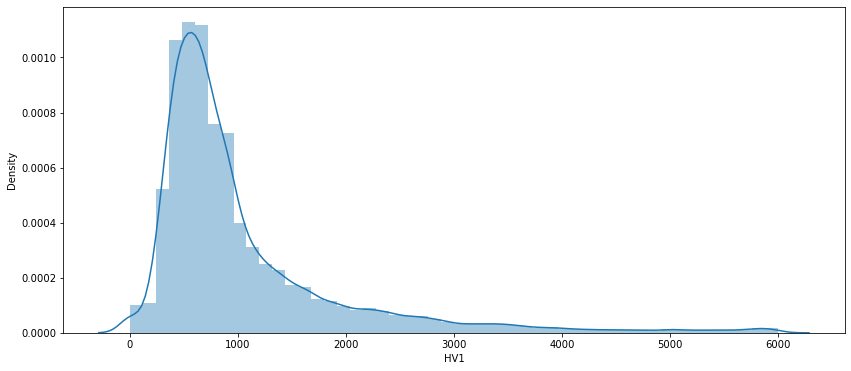

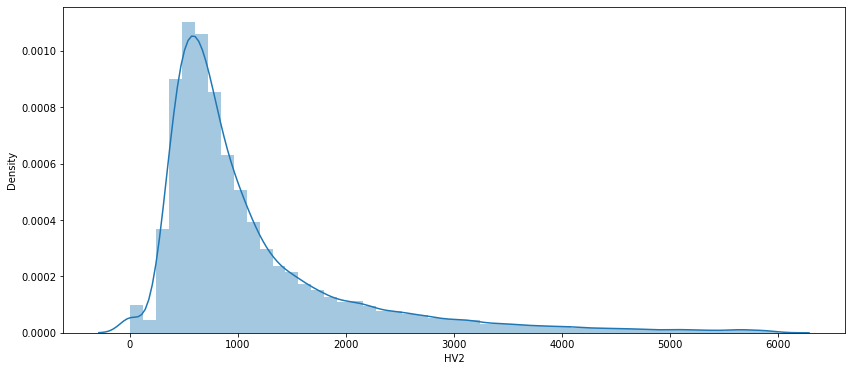

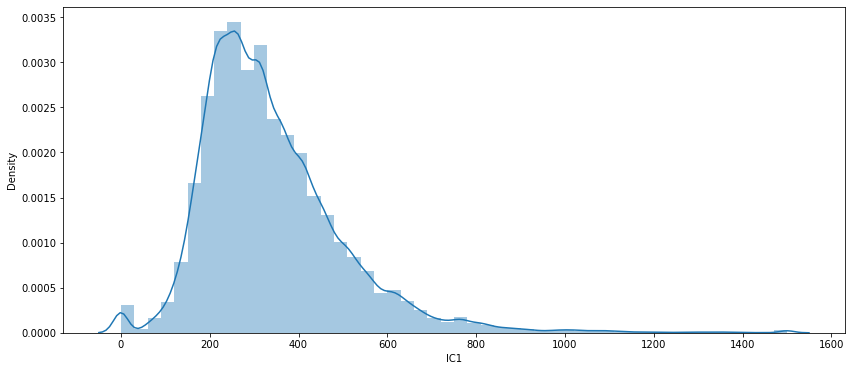

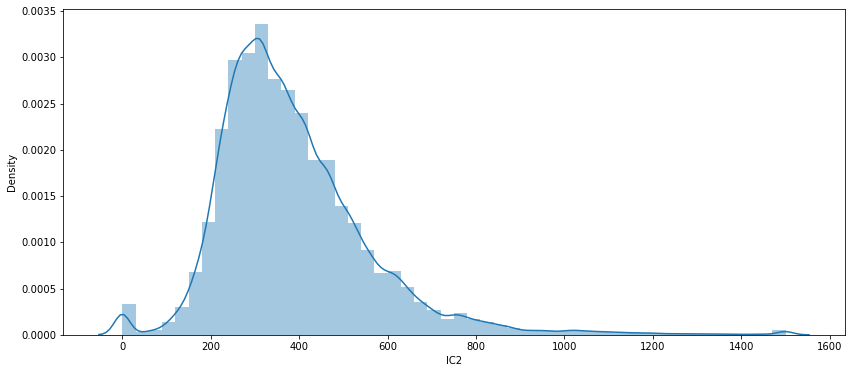

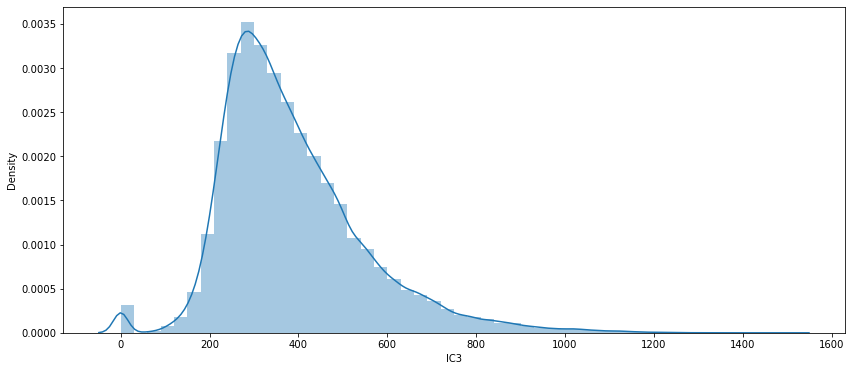

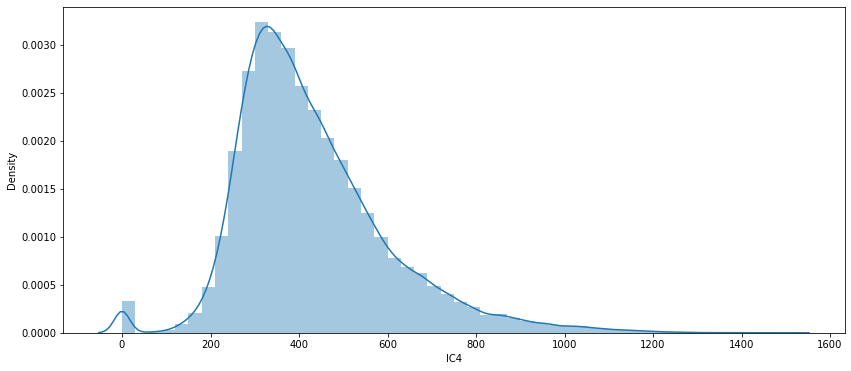

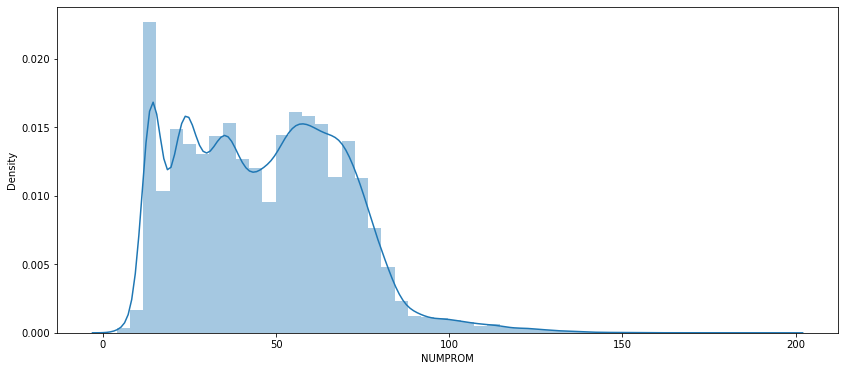

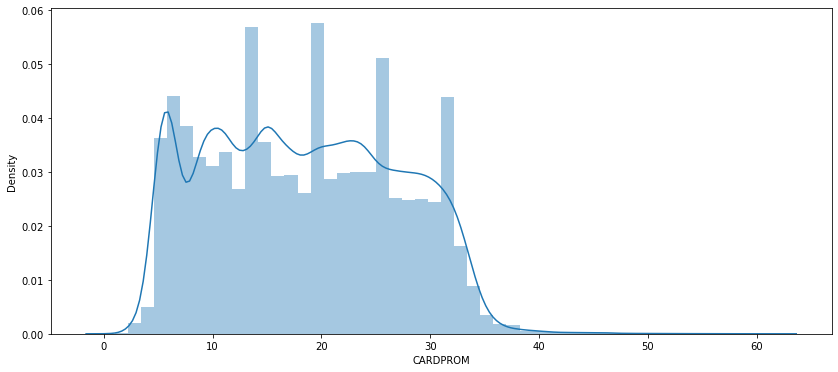

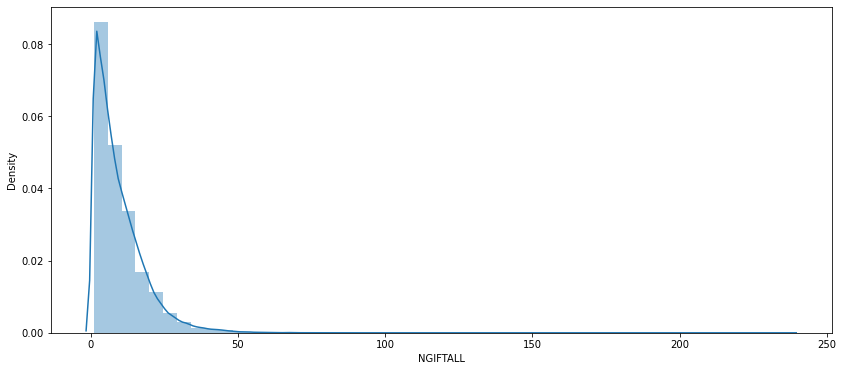

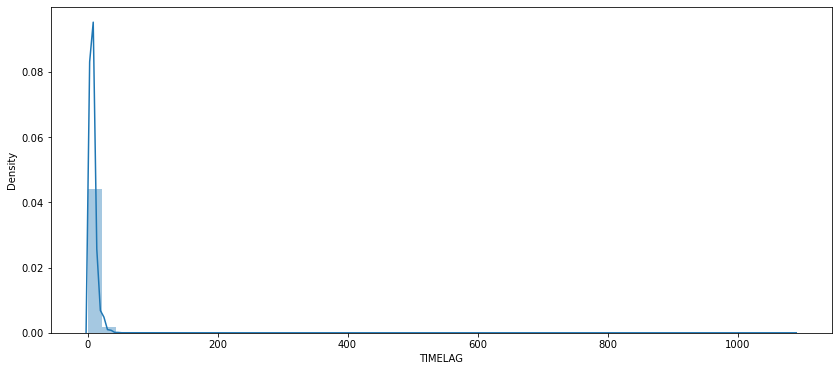

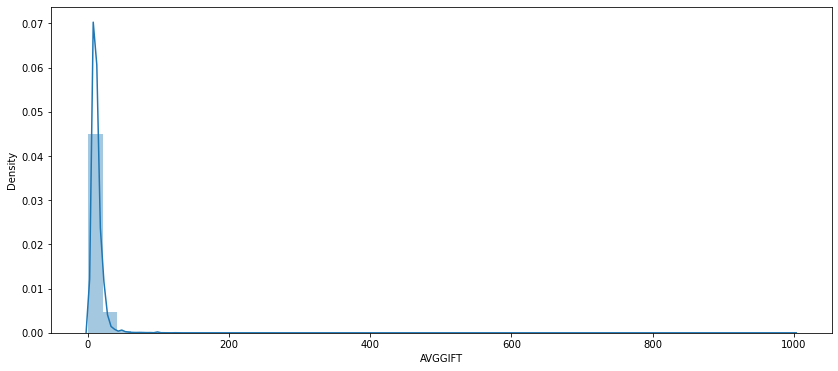

In [43]:
for column in data_corr:
    plt.figure(figsize = (14,6))
    sns.distplot(data_corr[column])
plt.show()

In [44]:
scaled_dfs = [Normalizer().fit_transform(data_corr), StandardScaler().fit_transform(data_corr), MinMaxScaler().fit_transform(data_corr)]

Transformation


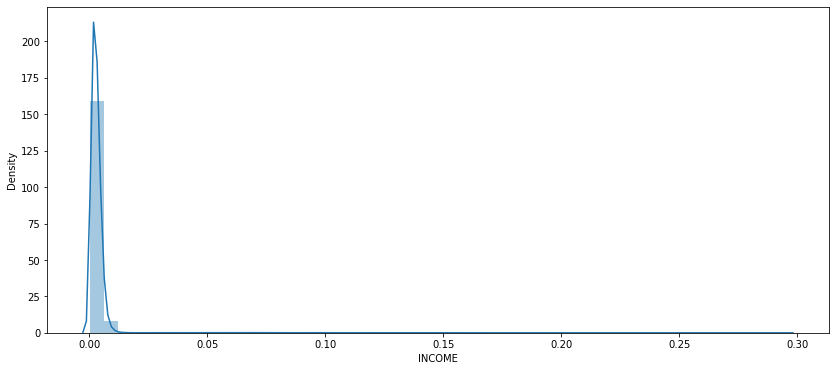

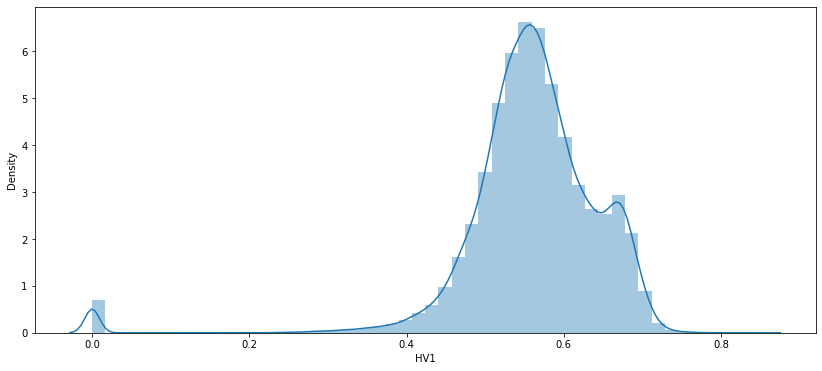

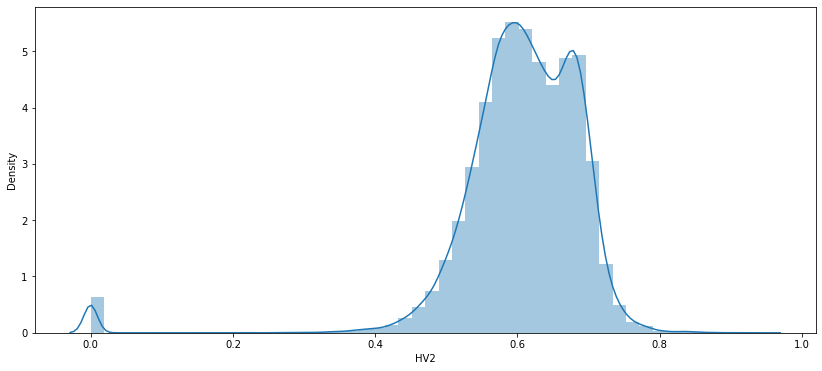

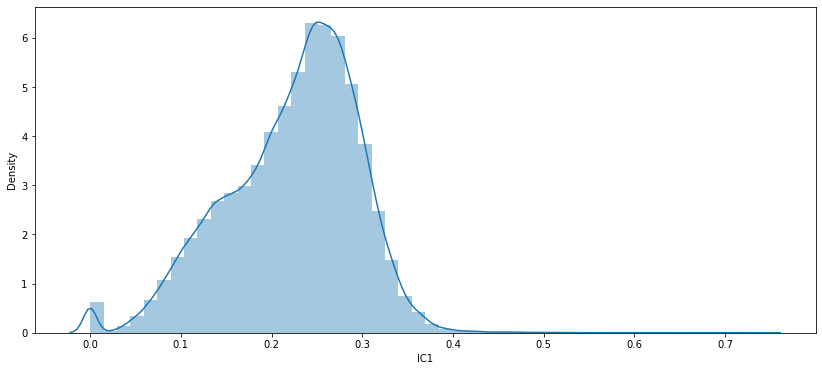

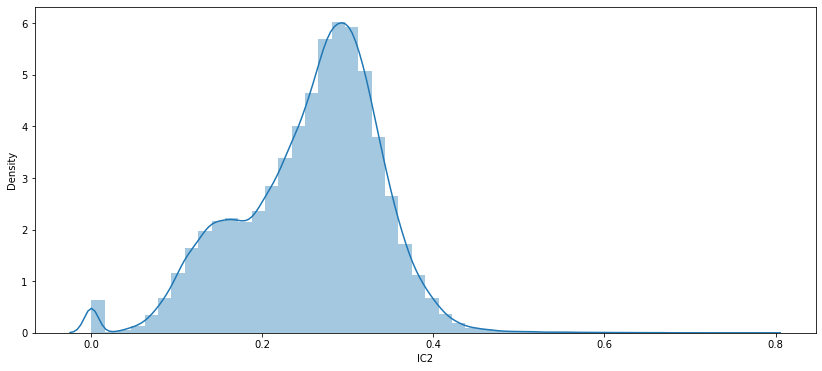

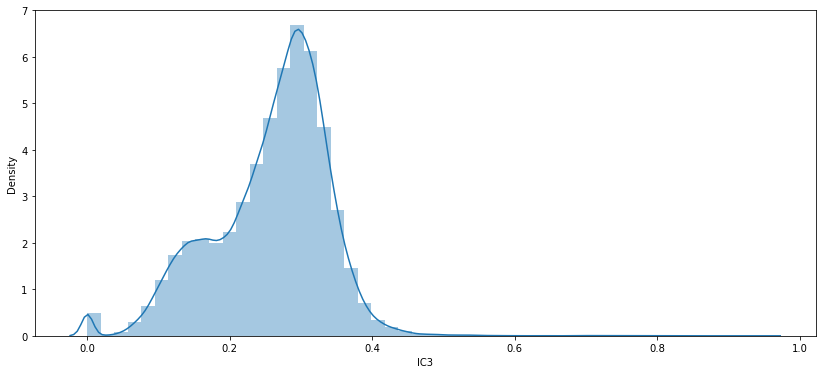

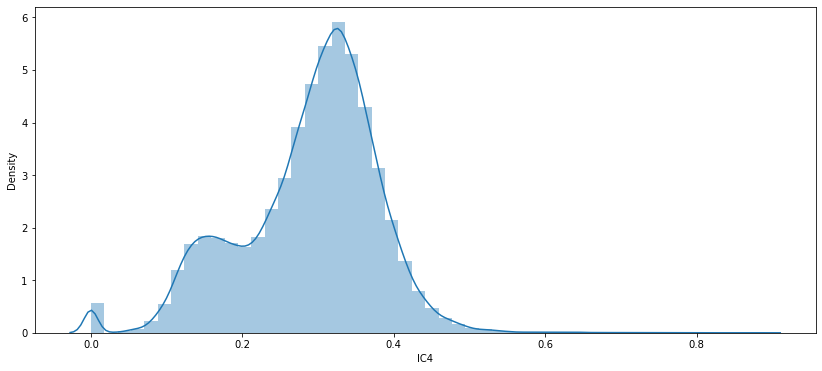

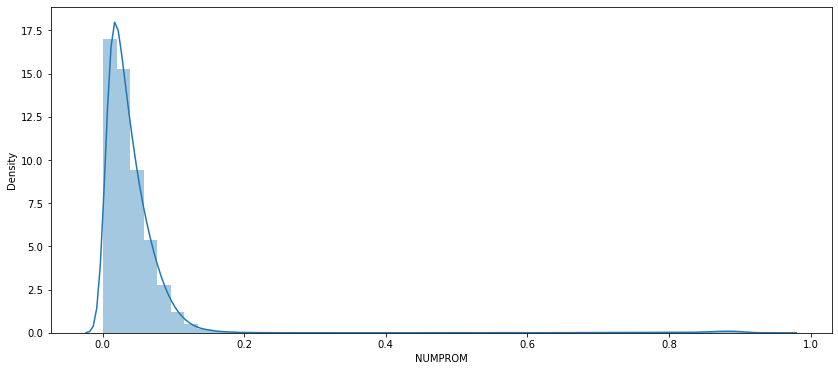

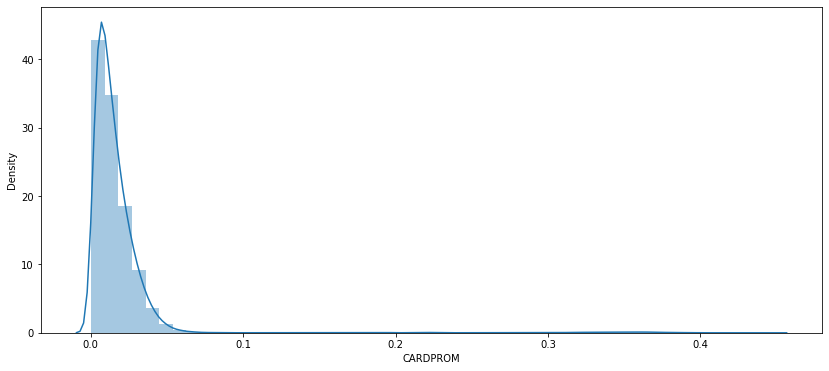

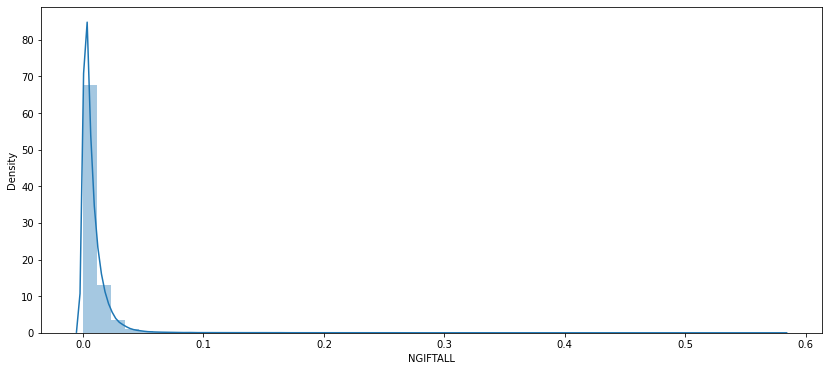

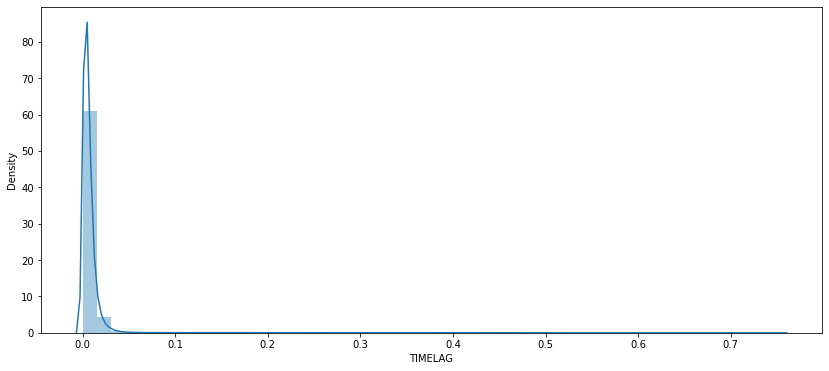

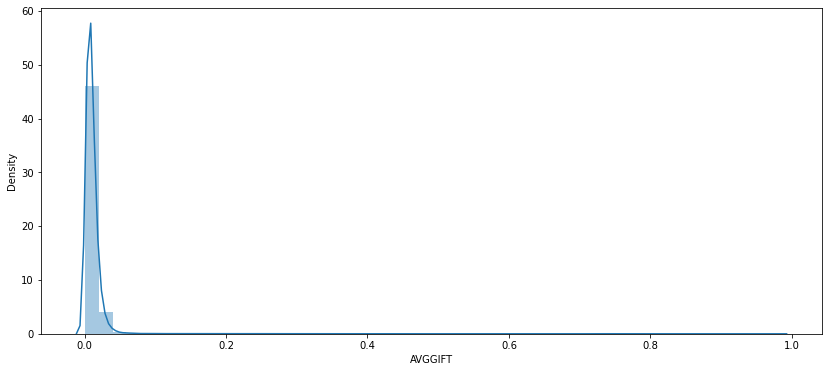

Transformation


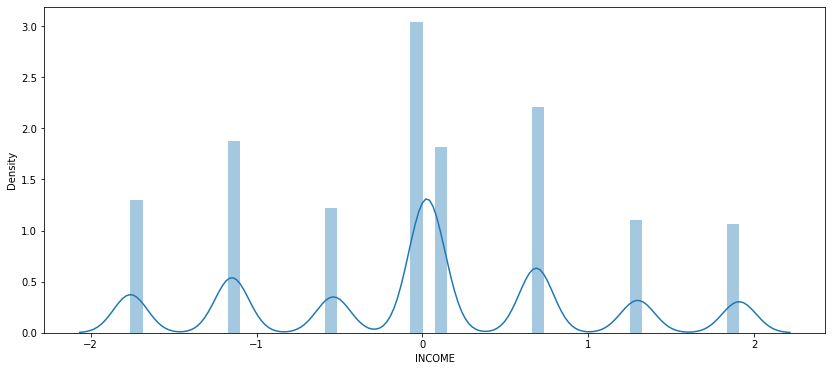

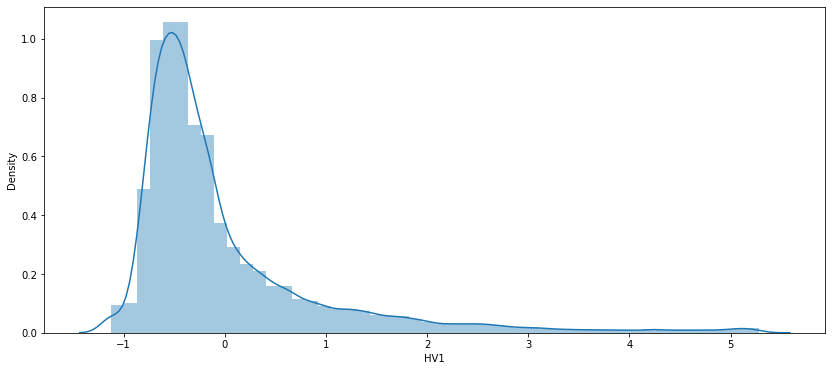

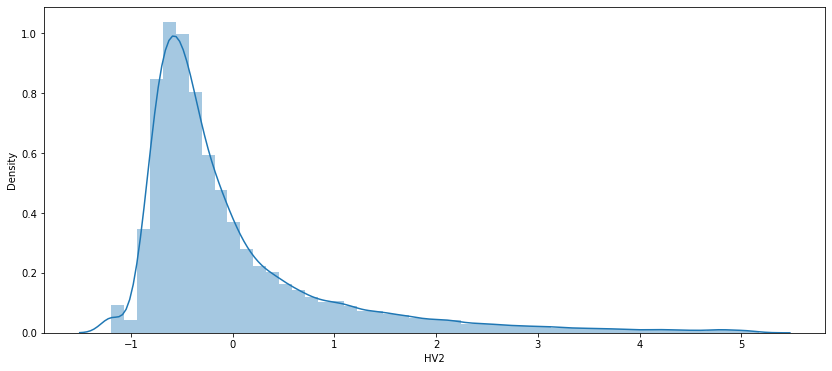

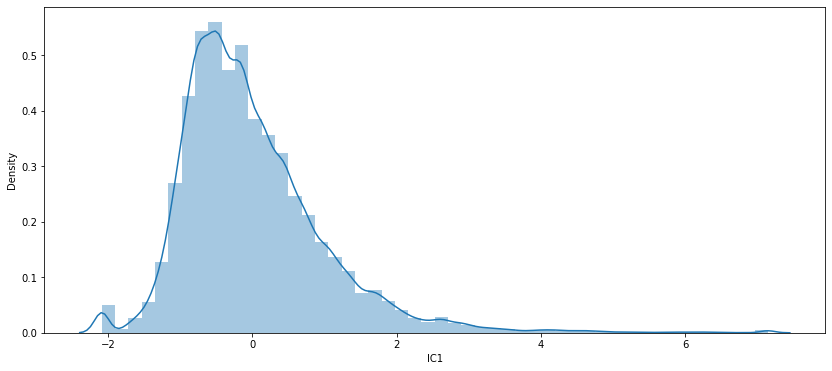

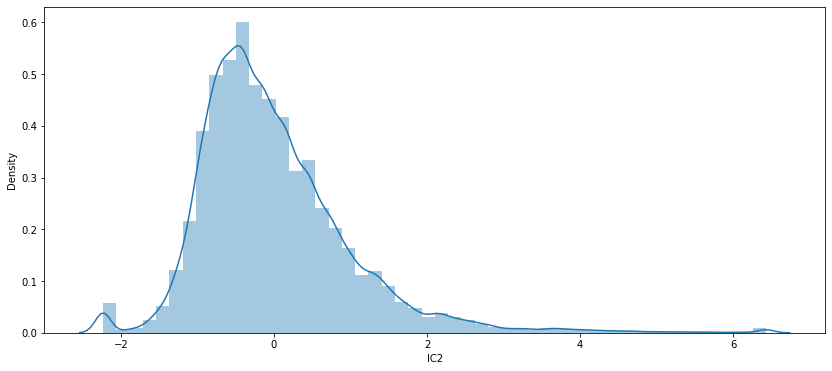

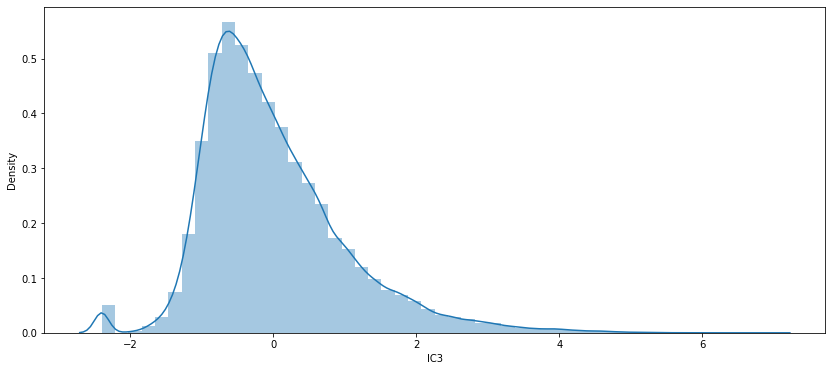

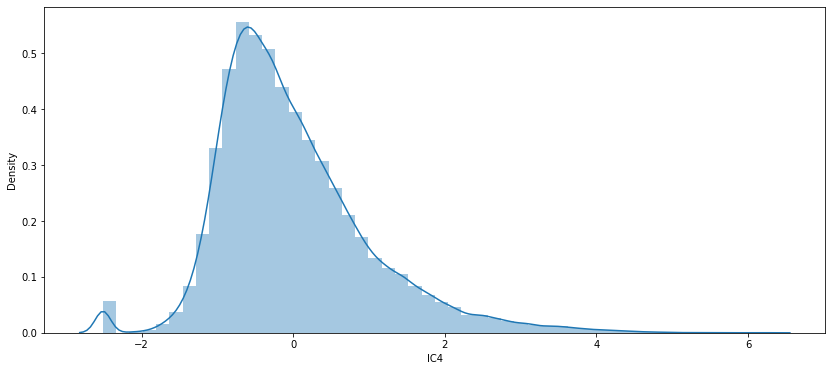

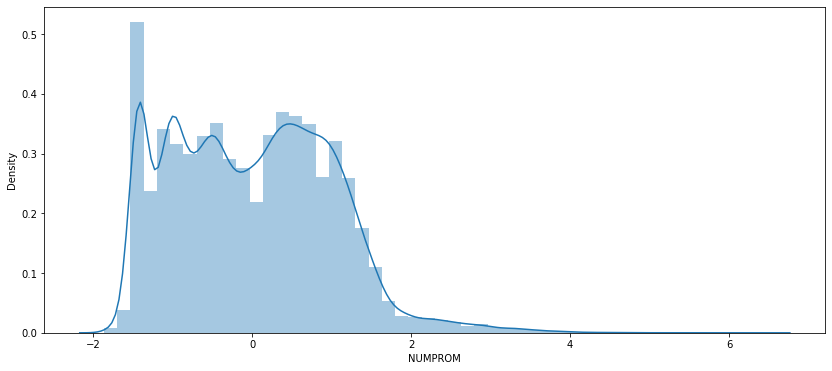

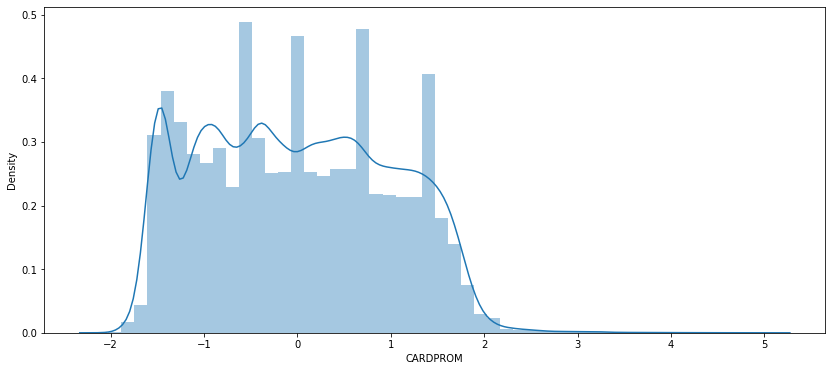

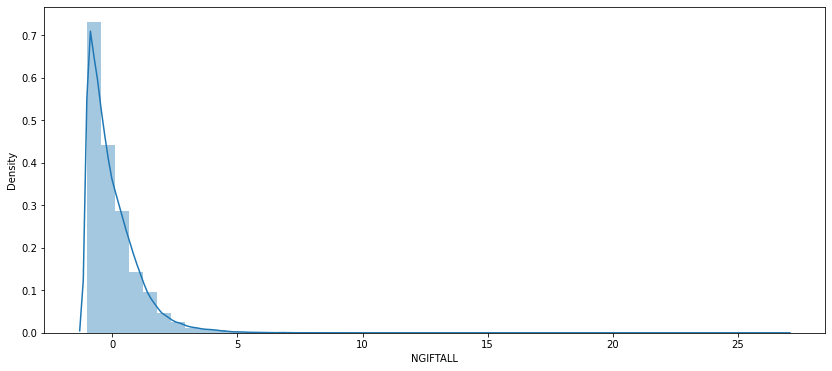

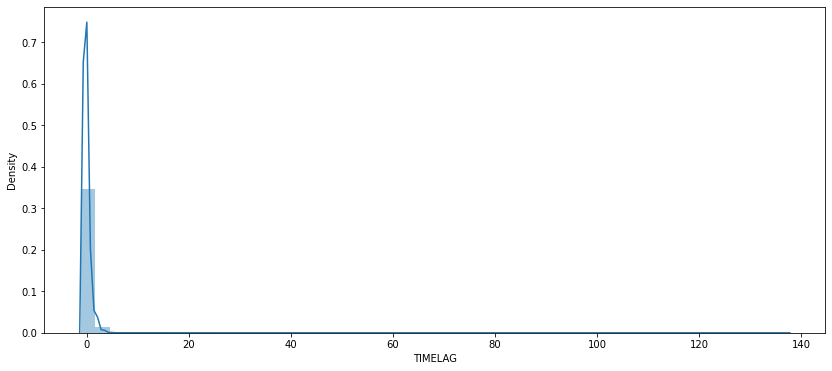

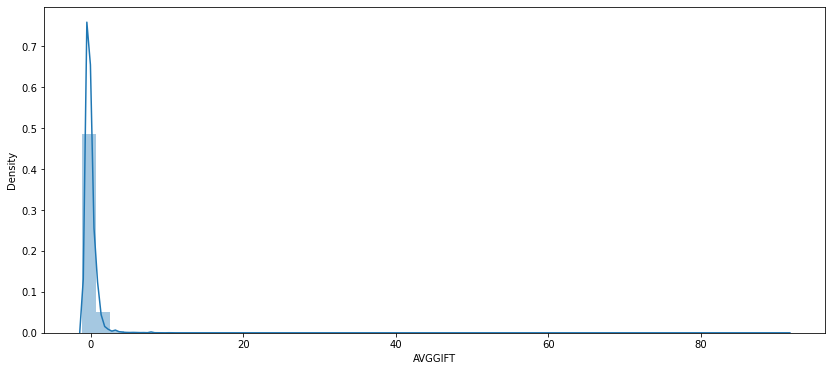

Transformation


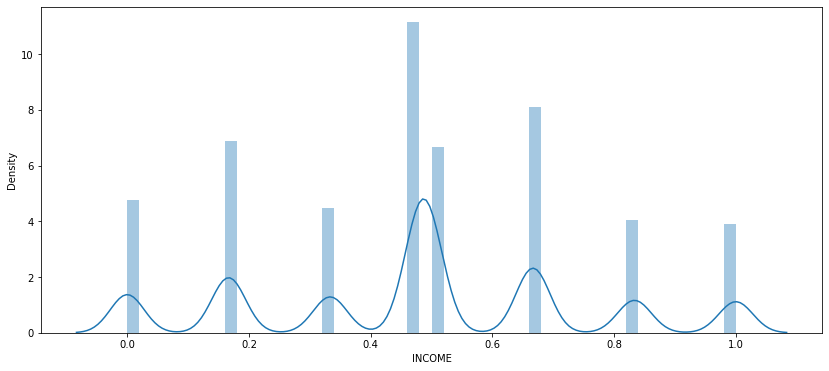

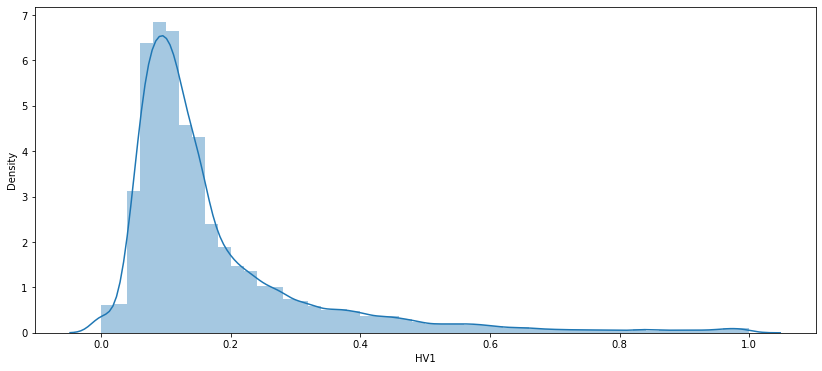

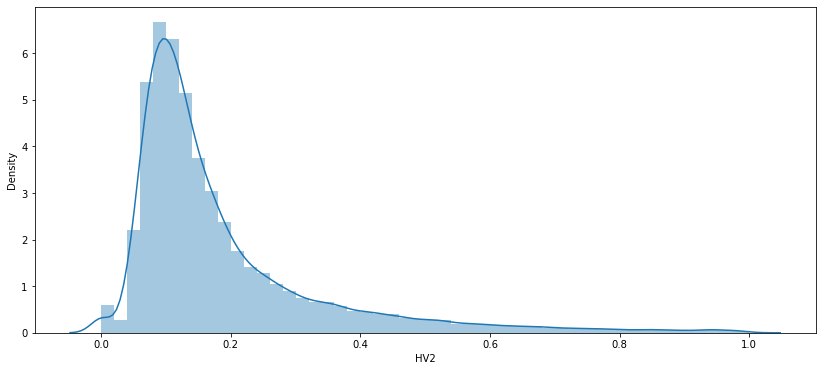

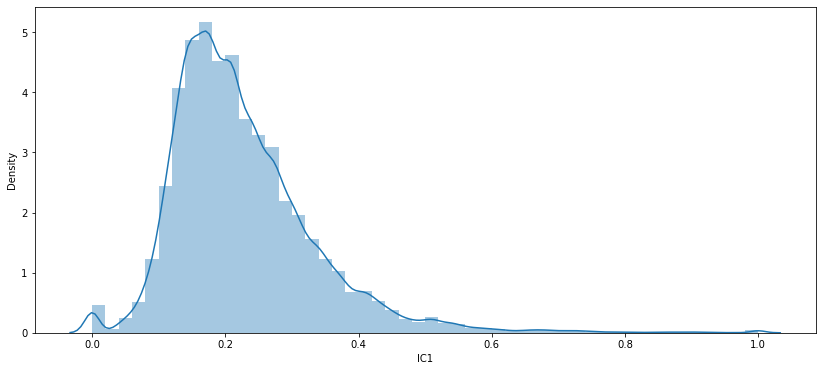

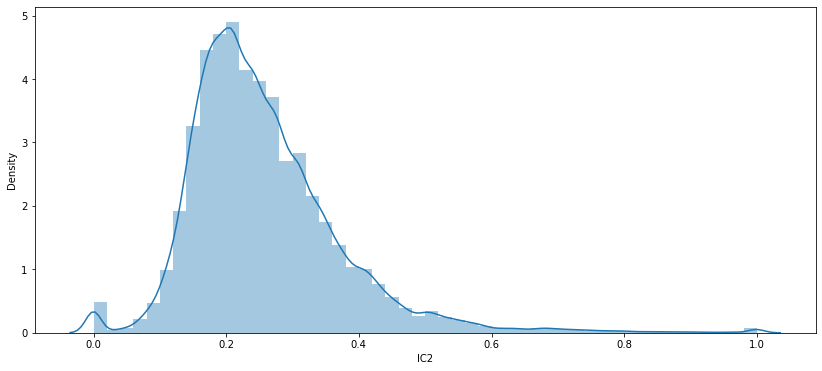

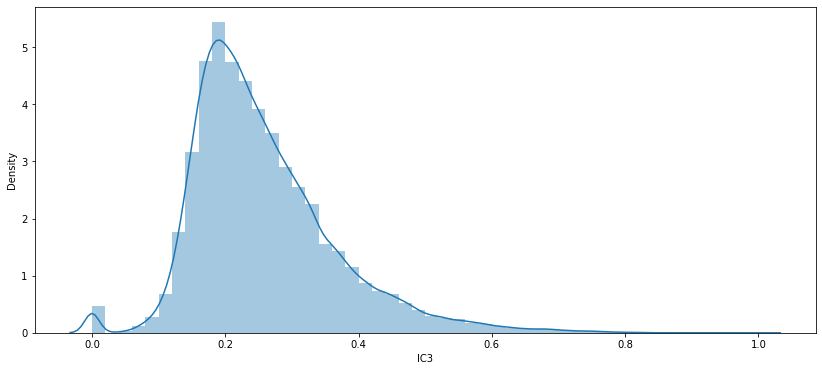

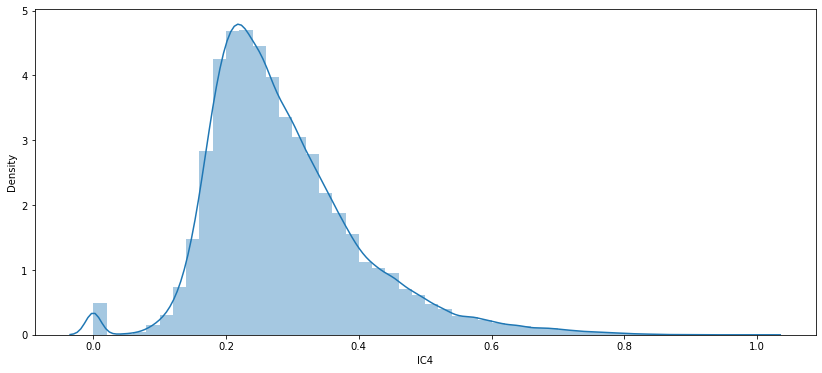

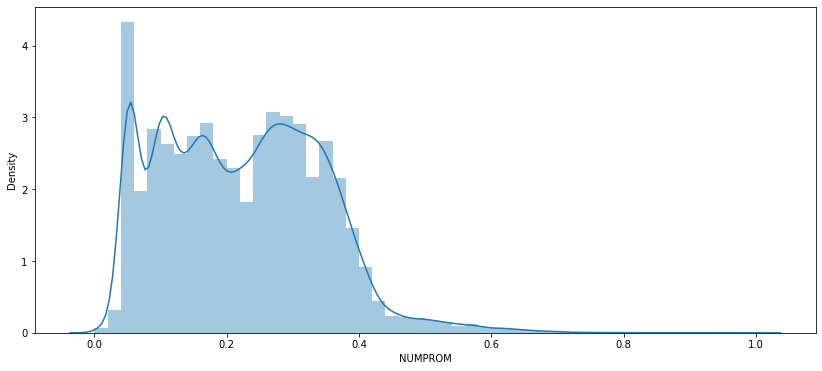

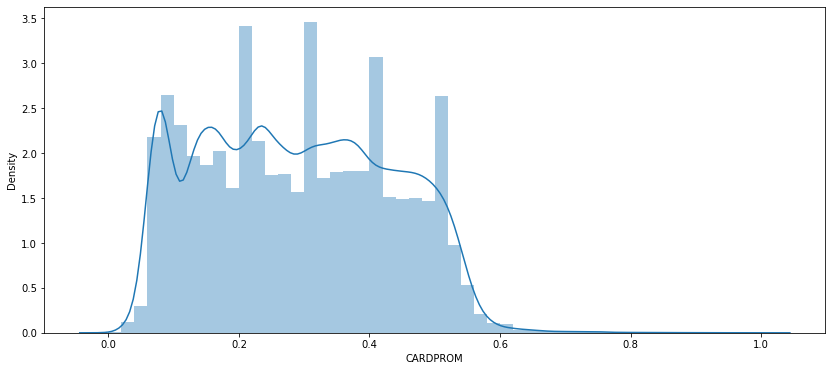

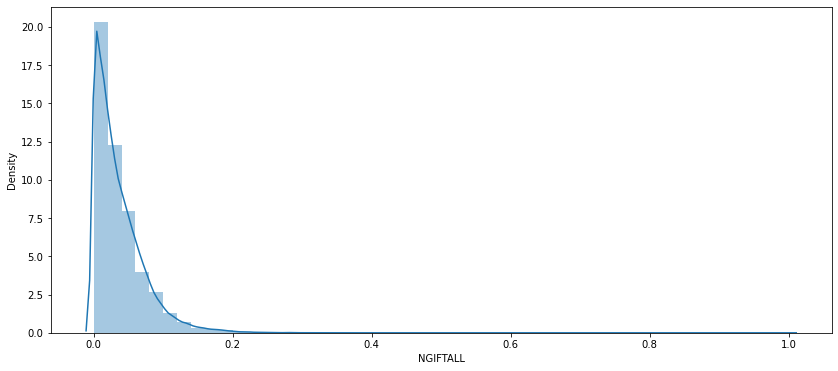

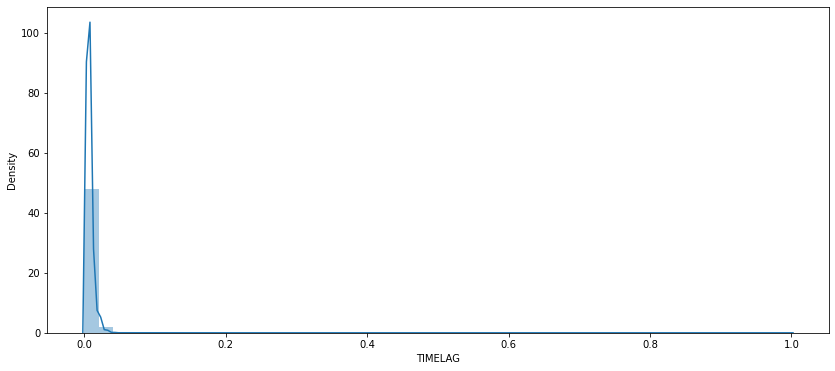

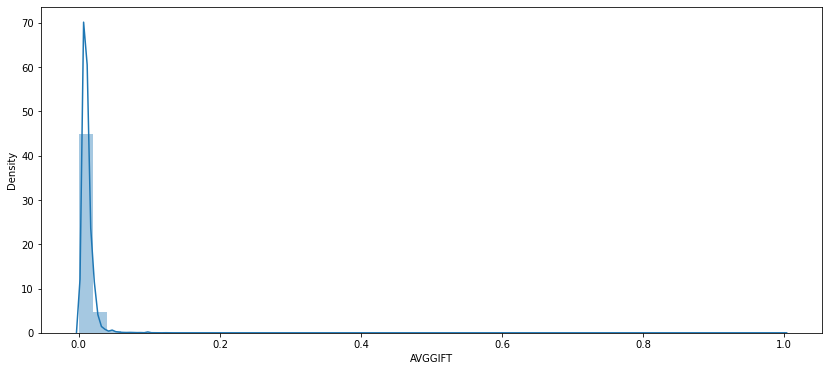

In [45]:
for scaled in scaled_dfs:
    new_df = pd.DataFrame(scaled)
    new_df.columns = data_corr.columns
    print("Transformation")
    for column in new_df:
        plt.figure(figsize = (14,6))
        sns.distplot(new_df[column])
    plt.show()

- We won't use normalizer because it doesn't work as expected

### Lesson 4 key concepts

> :clock10: 20 min

- Processing categorical column `DOMAIN`
- Encoding categorical column `DOMAIN` variables
- Introduce the `KNN` algorithm


Keep using the same dataset we use in class.

**Cleaning categorical column DOMAIN**

In [46]:
vals_domain = pd.DataFrame(data['DOMAIN'].value_counts())
vals_domain = vals_domain.reset_index()
vals_domain.columns = ['domain', 'counts']
group_vals_domain_df = vals_domain[vals_domain['counts']<5000]
group_vals_domain = list(group_vals_domain_df['domain'])
group_vals_domain

['T1', 'R3', 'U1', 'U2', 'U3', 'T3', 'S3', 'U4', 'R1']

In [48]:
def clean_vals_domain(x):
    if x in group_vals_domain:
        return 'other'
    else:
        return x

In [49]:
data['DOMAIN'] = list(map(clean_vals_domain, data['DOMAIN']))

In [56]:
data['DOMAIN'].value_counts()

other    26067
R2       13006
T2       11717
S1       10866
S2        8054
C2        7834
C1        5793
C3        5056
Name: DOMAIN, dtype: int64

In [58]:
data['DOMAIN'].fillna('other', inplace=True)

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data[['DOMAIN']])
encoded = encoder.transform(data[['DOMAIN']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 4.04 Activity 4

Keep using the same dataset.

Create one of the two scaling methods we have seen (_standard_ and _minmax_) as a Python function

**Solution to Activity 4**

In [ ]:
def standardization(ls, mean = True , std = True):

    array = np.array(ls)
    if mean == True:
        mean = array.mean()
    if std == True:
        std = array.std()

    return (array - mean) / std, mean, std

In [ ]:
def min_max(ls, minimum = True , maximum = True):

    array = np.array(ls)
    if minimum == True:
        minimum = array.min()
    if maximum == True:
        maximum = array.max()

    return (array - minimum) / (maximum - minimum), minimum, maximum

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```


### LAB Solution

In [60]:
# No NaNs so just remove outliers (normalization method)
def outliers(column, threshold = 3):
    """
    docs
    """

    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [60]:
CLV_outliers = outliers(customer_df["customer_lifetime_value"])
MPA_outliers = outliers(customer_df["monthly_premium_auto"])

In [60]:
to_drop = CLV_outliers.index | MPA_outliers.index # Union
clean_customer_df = customer_df.drop(to_drop).reset_index(drop = True)
clean_customer_df

In [60]:
df_copy = clean_customer_df.copy()

In [60]:
# Normalizing continuous variables (but target)

continuous.remove("months_since_policy_inception")
continuous.remove("total_claim_amount")
for cont_var in continuous:
    maximum = clean_customer_df[cont_var].max()
    minimum = clean_customer_df[cont_var].min()
    clean_customer_df[cont_var] = clean_customer_df[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [60]:
customer_df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
customer_df.head()

In [60]:
customer_df.info()

In [60]:
customer_df.shape

**REMEMBER**

- Education, employment status, policy, and vehicle class are somewhat unbalanced.
- For education, we could turn it into a binary variable (`college +-`), but I wouldn't touch it.
- The policy is redundant, maybe we can classify it in `L1`, `L2` and `L3` groups.
- Id concatenates luxury SUV, sports car and luxury car into luxury or among the other classes.
- For employment, we could divide them among employed, unemployed and inactive.
- We can see that having open complaints isn't that common, so we can turn it into a binary variable, open - not open.
- For the number of policies, we could join use 1, 2, 3, 4+.

In [60]:
```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size
```

```python
customer_df.isna().sum()/len(customer_df)
clean_customer_df["education"] = clean_customer_df["education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x)
inactive = ["Medical Leave", "Disabled", "Retired"]

In [60]:
clean_customer_df["employmentstatus"] = clean_customer_df["employmentstatus"].apply(lambda x: "Inactive" if x in inactive else x)
clean_customer_df["gender"] = clean_customer_df["gender"].apply(lambda x: 1 if x == "F" else 0)
clean_customer_df["policy"] = clean_customer_df["policy"].apply(lambda x: x[-2:])
luxury = ["Sports Car", "Luxury SUV", "Luxury Car"]
clean_customer_df["vehicle_class"] = clean_customer_df["vehicle_class"].apply(lambda x: "Luxury" if x in luxury else x)

In [60]:
# copy
final_df = clean_customer_df.copy()

In [60]:
# drop customer (id)
ordinal = clean_customer_df.drop(columns = "customer")
ordinal

In [60]:
# Ordinal encoders
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# Ordinal vehicle size

ordinal["coverage"] = ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["employmentstatus"] = ordinal["employmentstatus"].map({"Unemployed" : 0, "Inactive" : 1, "Employed" : 2})
ordinal["location_code"] = ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["vehicle_size"] = ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [60]:
one_hot = ordinal.copy()
one_hot_colums = final_df.select_dtypes(include = object).columns[1:]
one_hot_colums

# One hot encoders

# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

In [60]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_colums)
one_hot

In [61]:
final_df = one_hot.copy()
final_df["day"] = time_df["day"]
final_df["week"] = time_df["week"]
final_df["month"] = time_df["month"]
final_df = final_df.drop(columns = "effective_to_date")
final_df.apply(pd.to_numeric)

NameError: name 'one_hot' is not defined

### Additional Resources

- [Difference between `standardscaler` and Normalizer in `sklearn.preprocessing`](https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing)